# Bigdatamart Analysis

# Load and view data

In [86]:
# Load relevant libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Load data
ds_train=pd.read_csv('bigdatamart_Train.csv')
ds_test=pd.read_csv('bigdatamart_Test.csv')


In [89]:
ds_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
ds_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observation: The standard deviation for Item_Outlet_Sales is quite large which might suggest that it will be difficult to predict it accurately.

In [92]:
ds_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [93]:
ds_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [94]:
ds_train.shape

(8523, 12)

In [95]:
ds_test.shape

(5681, 11)

In [96]:
ds_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [97]:
ds_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Observation: ds_test does not contain the Item_Outlet_Sales column, it will have to be added later as it will be the target.

In [98]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [99]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Check and replace null values

In [100]:
ds_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
ds_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [102]:
ds_train['Item_Weight'].fillna(ds_train['Item_Weight'].mean(),inplace=True)

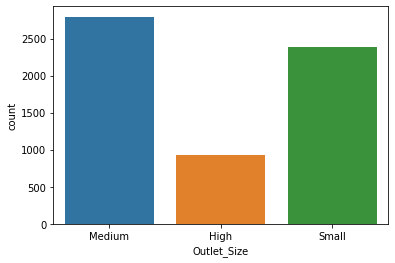

In [103]:
sns.countplot(ds_train['Outlet_Size'])

In [104]:
ds_train= ds_train.replace(np.nan, 'Medium', regex=True)

In [105]:
ds_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [106]:
ds_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
ds_test['Item_Weight'].fillna(ds_test['Item_Weight'].mean(),inplace=True)

In [108]:
ds_test= ds_test.replace(np.nan, 'Medium', regex=True)

In [109]:
ds_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Encode categorical data to numerical data with LabelEncoder

In [110]:
# Change categorical data to numerical data for all categoriacl columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


In [111]:
#Train set
cols=['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for col in cols:
    ds_train[col] = le.fit_transform(ds_train[col])

In [112]:
ds_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [113]:
# Test set
cols=['Item_Fat_Content','Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for col in cols:
    ds_test[col] = le.fit_transform(ds_test[col])

In [114]:
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,13,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300000,4,0.038428,4,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315000,1,0.015388,13,155.0340,OUT017,2007,1,1,1
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3


# Correct skewness

In [115]:
ds_train.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [116]:
ds_test.skew()

Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [117]:
#Treating using log
trainsk=ds_train.drop(columns=['Item_Identifier','Outlet_Identifier'])
testsk=ds_test.drop(columns=['Item_Identifier','Outlet_Identifier'])


In [118]:
for col in trainsk.columns:
    if trainsk.skew().loc[col]>0.55:
        trainsk[col]=np.log1p(trainsk[col])

In [119]:
trainsk.skew()

Item_Weight                  0.090561
Item_Fat_Content            -0.332843
Item_Visibility              1.015334
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.236040
Item_Outlet_Sales           -0.882266
dtype: float64

# Reducing skewness using square root function
for col in trainsk.columns:
    if trainsk.skew.loc[col]>0.55:
        trainsk[col]=np.sqrt(trainsk[col])
trainsk.skew()

Gives error that loc is not in function


# Check correlations

In [120]:
# Check correlation
trainskcor=trainsk.corr()
trainskcor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.015940,-0.012044,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.001187,0.008059
Item_Fat_Content,-0.015940,1.000000,0.033649,-0.115934,0.002278,-0.002087,-0.011713,-0.006528,-0.002072,0.007620
Item_Visibility,-0.012044,0.033649,1.000000,-0.035995,-0.000701,-0.072349,0.067534,-0.027210,-0.220345,-0.188500
Item_Type,0.028015,-0.115934,-0.035995,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003380,0.019914
Item_MRP,0.024756,0.002278,-0.000701,0.032651,1.000000,0.005020,0.006059,0.000232,0.000053,0.509886
Outlet_Establishment_Year,-0.008301,-0.002087,-0.072349,0.004970,0.005020,1.000000,0.193389,-0.089216,0.020071,0.077032
Outlet_Size,-0.007225,-0.011713,0.067534,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.223204,-0.122951
Outlet_Location_Type,0.004088,-0.006528,-0.027210,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.389361,0.059030
Outlet_Type,-0.001187,-0.002072,-0.220345,0.003380,0.000053,0.020071,-0.223204,0.389361,1.000000,0.574313
Item_Outlet_Sales,0.008059,0.007620,-0.188500,0.019914,0.509886,0.077032,-0.122951,0.059030,0.574313,1.000000


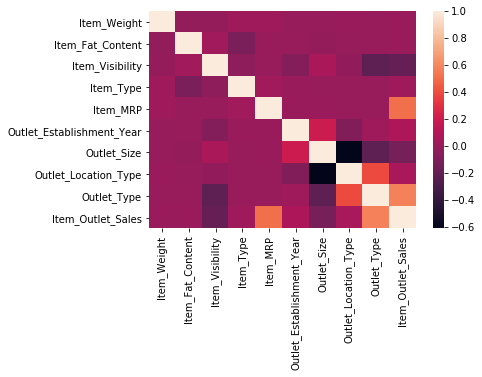

In [121]:
# Show correlation heatmap
sns.heatmap(trainskcor)

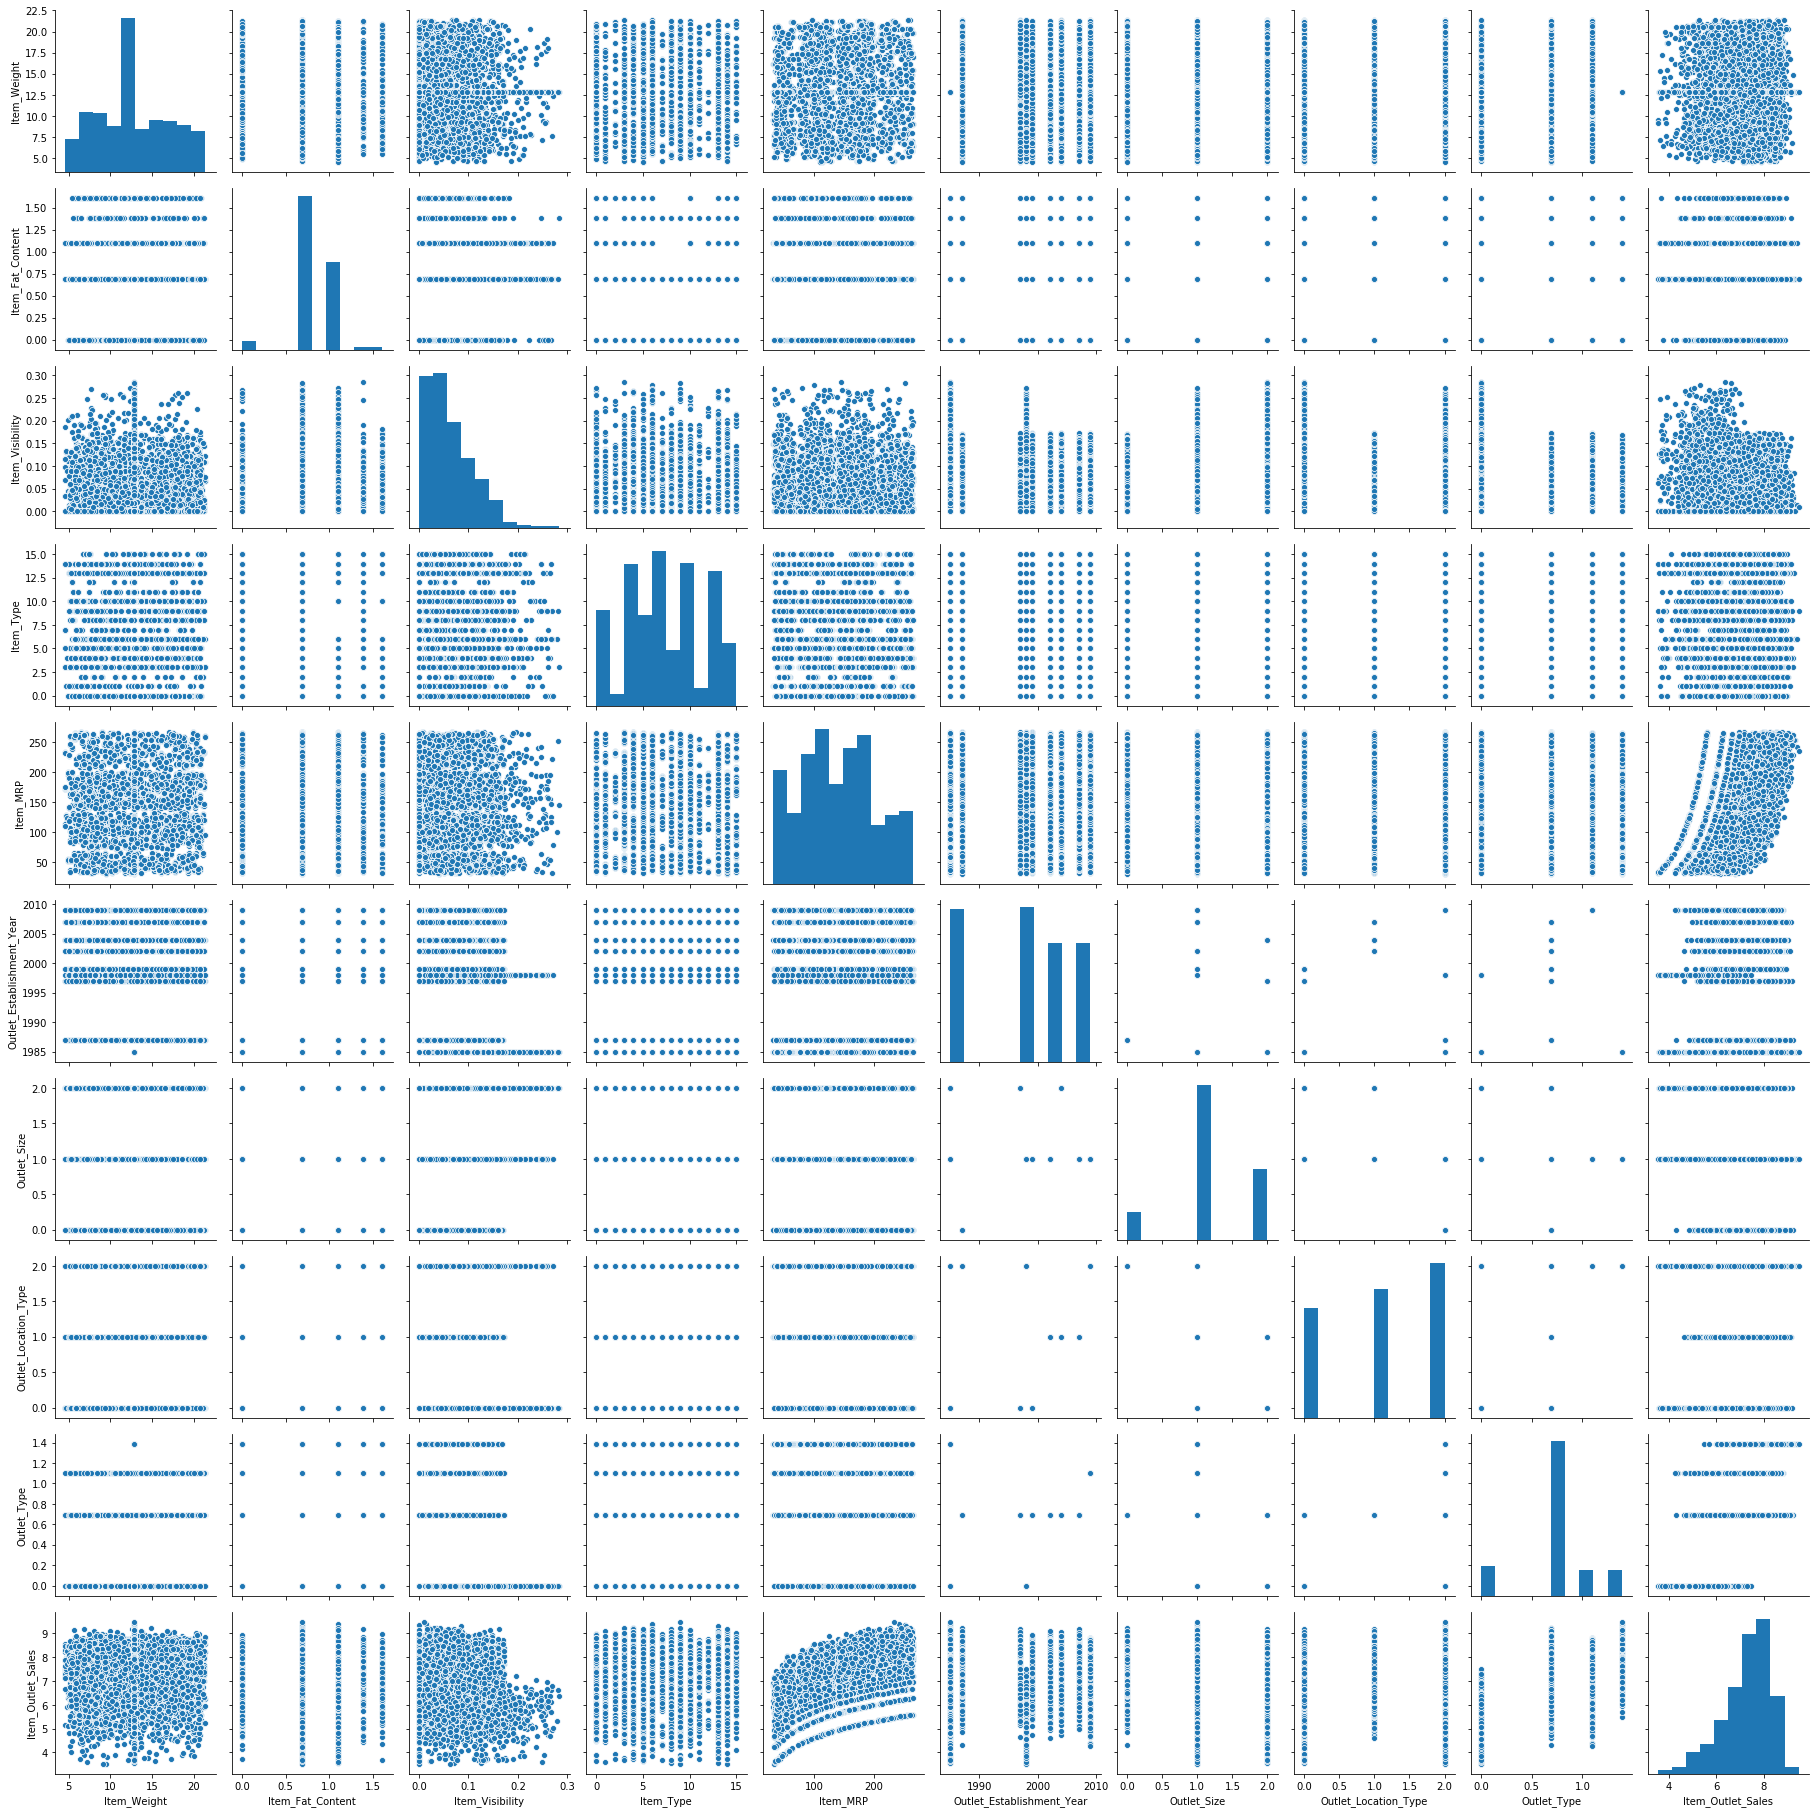

In [122]:
# Checking pairplots
sns.pairplot(trainsk)
plt.show()

# Check and remove outliers

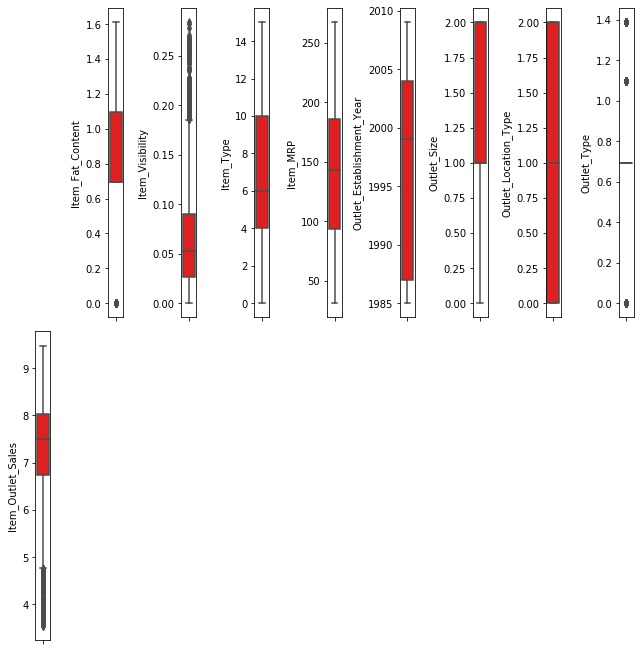

In [123]:
# Show boxplots for all numerical columns, check outliers
collist=trainsk.columns.values
ncol=9
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(trainsk[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [124]:
#Train set
from scipy.stats import zscore
z_score=abs(zscore(trainsk))
print(trainsk.shape)
ztrainsk=trainsk.loc[(z_score<3).all(axis=1)]
print(ztrainsk.shape)

(8523, 10)
(8075, 10)


In [125]:
#Test set
from scipy.stats import zscore
z_score2=abs(zscore(testsk))
print(testsk.shape)
ztestsk=testsk.loc[(z_score2<3).all(axis=1)]
print(ztestsk.shape)

(5681, 9)
(5525, 9)


# Linear regression

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model
import pickle

In [127]:
trainsk.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [128]:
trainsk.dtypes

Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [129]:
# Select data to use and target values
nds_x=trainsk.drop(columns=['Item_Outlet_Sales'])
nds_y=trainsk[['Item_Outlet_Sales']]

In [130]:
#Scaling for linear regression
sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [131]:
x.skew()

Item_Weight                  0.090561
Item_Fat_Content            -0.332843
Item_Visibility              1.015334
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.236040
dtype: float64

In [132]:
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=55, test_size=0.20)

In [133]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 76 is 0.6722517068685907


In [134]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,nds_y,cv=10,scoring='r2').mean()

0.6419574460033146

In [135]:
# R2 score gives us a rondom state of 76
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=76, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [136]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.6722517068685907
RMSE is:  0.5880341493002196


This is not a great score

# Other regression methods 


In [137]:
from sklearn.metrics import accuracy_score

In [138]:
# Best parameters for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [139]:
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))



0.7432867189142593


In [140]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.6329309581331266
0.7063098819620768
0.7487866750625234


In [141]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
print(svr.score(x_train,y_train))

0.7487866750625234


# Save and load model for prediction

I choose the SVR model with a kernel of rbf as my final model because it has the highest accuracy score.

In [142]:
#save model as a pickle file
joblib.dump(svr,'Item_outlet_sales.pkl')

['Item_outlet_sales.pkl']

In [143]:
fmodel=joblib.load('Item_outlet_sales.pkl')

In [144]:
fmodel.predict(testsk)

array([6.63685745, 6.63685745, 6.63685745, ..., 6.63685745, 6.63685745,
       6.63685745])